In [23]:
import yfinance as yf

In [24]:
companies_tickers = {
    "Google" : "GOOG",
    # "Apple" : "AAPL",
    # "Microsoft" : "MSFT",
    # "Tesla" : "TSLA"
}

In [25]:
companie = "Google"
ticker = yf.Ticker(companies_tickers[companie])

In [26]:
data = ticker.history(period="5y").reset_index()

In [27]:
data

# First calculate the mid prices from the highest and lowest
# high_prices = df.loc[:,'High'].as_matrix()
# low_prices = df.loc[:,'Low'].as_matrix()
# mid_prices = (high_prices+low_prices)/2.0

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-27 00:00:00-05:00,71.293839,71.646074,70.805588,71.438316,35104000,0.0,0.0
1,2020-01-28 00:00:00-05:00,71.891695,72.539370,71.367076,72.367981,31548000,0.0,0.0
2,2020-01-29 00:00:00-05:00,72.678856,73.009166,72.078010,72.670387,21554000,0.0,0.0
3,2020-01-30 00:00:00-05:00,71.740231,72.603128,71.562867,72.531387,26788000,0.0,0.0
4,2020-01-31 00:00:00-05:00,73.182049,73.243329,71.170774,71.454758,48344000,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-01-17 00:00:00-05:00,198.050003,198.809998,195.309998,197.550003,22109100,0.0,0.0
1253,2025-01-21 00:00:00-05:00,200.509995,203.839996,199.440002,199.630005,19005200,0.0,0.0
1254,2025-01-22 00:00:00-05:00,200.550003,202.119995,199.199997,200.029999,15477400,0.0,0.0
1255,2025-01-23 00:00:00-05:00,199.979996,201.940002,196.820007,199.580002,15170800,0.0,0.0


In [28]:
# save the data
data.to_csv(f"data/{companie.lower()}_data.csv",index=False)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#importer le dataset
dataset = pd.read_csv("data/google_data.csv")
dataset


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-27 00:00:00-05:00,71.293839,71.646074,70.805588,71.438316,35104000,0.0,0.0
1,2020-01-28 00:00:00-05:00,71.891695,72.539370,71.367076,72.367981,31548000,0.0,0.0
2,2020-01-29 00:00:00-05:00,72.678856,73.009166,72.078010,72.670387,21554000,0.0,0.0
3,2020-01-30 00:00:00-05:00,71.740231,72.603128,71.562867,72.531387,26788000,0.0,0.0
4,2020-01-31 00:00:00-05:00,73.182049,73.243329,71.170774,71.454758,48344000,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-01-17 00:00:00-05:00,198.050003,198.809998,195.309998,197.550003,22109100,0.0,0.0
1253,2025-01-21 00:00:00-05:00,200.509995,203.839996,199.440002,199.630005,19005200,0.0,0.0
1254,2025-01-22 00:00:00-05:00,200.550003,202.119995,199.199997,200.029999,15477400,0.0,0.0
1255,2025-01-23 00:00:00-05:00,199.979996,201.940002,196.820007,199.580002,15170800,0.0,0.0


In [30]:
#choix du dataset
series = dataset.iloc[:,1:2].values

In [31]:
series

array([[ 71.29383882],
       [ 71.89169542],
       [ 72.67885598],
       ...,
       [200.55000305],
       [199.97999573],
       [199.8500061 ]])

In [32]:
#normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
series = sc.fit_transform(series)

In [33]:
len(series)

1257

In [35]:
decallage_temporel = 1
n_data_70 = round(len(series)*0.7)
n_data_30 = round(len(series)*0.3)
(n_data_70,n_data_30)

(880, 377)

In [36]:
#X_train,X_test
X_train = series[0:n_data_70]
X_test = series[n_data_70:]
y_train = series[decallage_temporel:n_data_70+decallage_temporel]
y_test = series[n_data_70:]

X_train = X_train.reshape(n_data_70,1,1)
X_test = X_test.reshape(n_data_30,1,1)

In [38]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

regressor = Sequential()
#LSTM
regressor.add(LSTM(3,activation ="sigmoid"))
#output layer
regressor.add(Dense(1,activation = "tanh"))
regressor.compile(optimizer="rmsprop",loss = "mean_squared_error")
regressor.fit(X_train,y_train,epochs= 1000,batch_size =32)

Epoch 1/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6971
Epoch 2/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6022 
Epoch 3/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5214
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4443 
Epoch 5/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3806
Epoch 6/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3162
Epoch 7/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2674
Epoch 8/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2113
Epoch 9/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1727
Epoch 10/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1354
Epoch 11/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1047
Epoch 12/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0763
Epoch 13/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584
Epoch 14/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448
Epoch 15/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


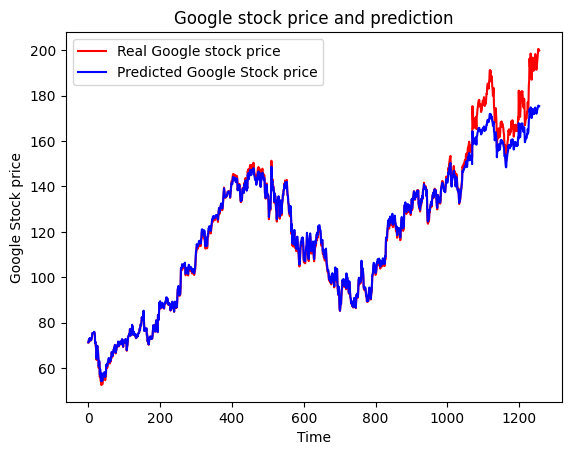

In [39]:
#predictions
training_set_pred = regressor.predict(X_train)
training_set_pred = sc.inverse_transform(training_set_pred)

testing_set_pred = regressor.predict(X_test)
testing_set_pred = sc.inverse_transform(testing_set_pred)

#plot valeurs reelles et predictions
real_results = sc.inverse_transform(series)
predictions = np.concatenate((training_set_pred,testing_set_pred),axis=0)

#visulaisations des resultats
plt.plot(real_results,color="red",label="Real Google stock price")
plt.plot(predictions,color="blue",label="Predicted Google Stock price")
plt.title("Google stock price and prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock price")
plt.legend()
plt.show()

In [ ]:
#prediction sur donnees inexistante
test_data = np.array([[[90]]])
pred = regressor.predict(test_data)
pred = sc.inverse_transform(pred)


test_data = np.array([90,65,42,45,45])
test_data = test_data.reshape(1,5,1)
pred = regressor.predict(test_data)
pred = sc.inverse_transform(pred)

test_data_new = np.array([[[90],[65],[42],[45],[45]]])
pred_new = regressor.predict(test_data_new)
pred_new = sc.inverse_transform(pred_new)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,training_set_pred)